In [1]:
#The basics
import pandas as pd
import numpy as np
import json
import seaborn as sns

#Plotting
import matplotlib.pyplot as plt


#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf 

from matplotlib.patches import Arc
from matplotlib import cm
from matplotlib.colors import Normalize


from matplotlib.patches import Ellipse
from pandas.io.json import json_normalize

## Import Selenium for scrape
from selenium import webdriver
import time

# Import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets

In [2]:
footy_df = pd.read_csv('international_matches_xg.csv')

In [3]:
# Drop the ones without any xG values
footy_df = footy_df[footy_df.team_a_xg != 0]

In [16]:
footy_df[['home_team_goal_count','away_team_goal_count','team_a_xg','team_b_xg']].corr()

,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg
home_team_goal_count,1.000000,-0.134715,0.481704,-0.277388
away_team_goal_count,-0.134715,1.000000,-0.290273,0.438421
team_a_xg,0.481704,-0.290273,1.000000,-0.457606
team_b_xg,-0.277388,0.438421,-0.457606,1.000000


Text(6,4,'R-squared = 0.482')

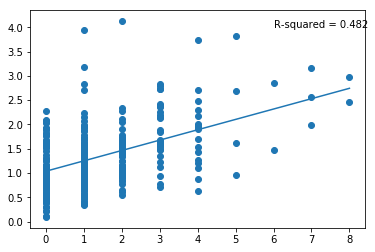

In [4]:
import scipy as sp
linreg = sp.stats.linregress(footy_df['home_team_goal_count'],footy_df['team_a_xg'])

plt.scatter(footy_df['home_team_goal_count'],footy_df['team_a_xg'])
plt.plot(np.unique(footy_df['home_team_goal_count']), np.poly1d(np.polyfit(footy_df['home_team_goal_count'], footy_df['team_a_xg'], 1))(np.unique(footy_df['home_team_goal_count'])))
plt.text(6, 4, 'R-squared = %0.3f' %linreg.rvalue)

In [21]:
r2_score(footy_df['home_team_goal_count'], footy_df['team_a_xg'])

NameError: name 'r2_score' is not defined

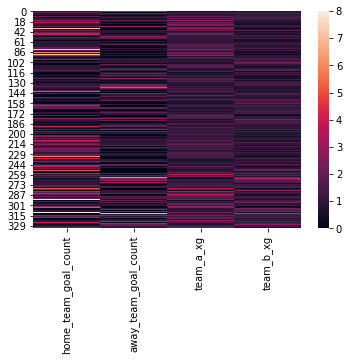

In [33]:
sns.heatmap(footy_df[['home_team_goal_count','away_team_goal_count','team_a_xg','team_b_xg']])

In [5]:
footy_df.groupby(by='home_team_name').mean()

,timestamp,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg
home_team_name,,,,,
Albania,1.606906e+09,1.500000,1.500000,0.977500,1.167500
Algeria,1.622750e+09,4.000000,1.000000,1.430000,0.540000
Andorra,1.610675e+09,0.333333,2.500000,0.635000,1.293333
Armenia,1.608377e+09,2.000000,0.800000,1.420000,1.358000
Austria,1.608975e+09,1.600000,2.000000,1.642000,0.990000
...,...,...,...,...,...
UAE,1.613748e+09,3.000000,0.000000,1.815000,0.455000
USMNT,1.614415e+09,5.500000,0.500000,2.350000,0.580000
Ukraine,1.611834e+09,1.142857,0.857143,1.477143,1.367143


In [6]:
euro_list = ['Turkey','Switzerland','Italy','Wales','Denmark','Finland','Belgium','Russia'
        ,'Netherlands','Ukraine','Austria','FYR Macedonia','England','Croatia','Scotland','Czech Republic'
       ,'Spain','Sweden','Poland','Slovakia','Hungary','Portugal','France','Germany']
euro_teams_df = pd.DataFrame(data=euro_list)

In [7]:
euro_teams_df=euro_teams_df.rename(columns={0:'euro_team'})

In [8]:
home_df = footy_df[['Competition','home_team_name','home_team_goal_count','team_a_xg','team_b_xg']]
away_df = footy_df[['Competition','away_team_name','away_team_goal_count','team_b_xg','team_a_xg']]

away_df.columns = home_df.columns

combined_df = pd.concat([home_df,away_df])

combined_df=combined_df.rename(columns={'home_team_name':'team_name','home_team_goal_count':'team_goal_count'})

In [9]:
Euros_teams_df = combined_df.merge(euro_teams_df,how='inner',left_on='team_name',right_on='euro_team',validate="many_to_one")

In [10]:
Euros_teams_df.groupby('team_name').mean()

,team_goal_count,team_a_xg,team_b_xg
team_name,,,
Austria,1.400000,1.508000,0.970000
Belgium,2.900000,1.204000,0.950000
Croatia,1.400000,1.438000,1.161000
Czech Republic,1.777778,1.693333,0.902222
Denmark,2.300000,1.269000,1.053000
England,1.700000,1.658000,0.719000
FYR Macedonia,2.090909,1.437273,1.153636
Finland,1.090909,0.899091,1.580909
France,1.900000,1.424000,1.047000


In [79]:
Euros_teams_df[Euros_teams_df['team_name']=='Spain']

,Competition,team_name,team_goal_count,team_a_xg,team_b_xg,euro_team
202,UEFA Nations League,Spain,4,2.18,0.62,Spain
203,UEFA Nations League,Spain,1,1.44,0.63,Spain
204,UEFA Nations League,Spain,6,1.47,0.16,Spain
205,WC Qualifiers,Spain,1,1.44,0.38,Spain
206,WC Qualifiers,Spain,3,2.72,0.56,Spain
207,UEFA Nations League,Spain,1,1.79,1.46,Spain
208,UEFA Nations League,Spain,0,2.52,0.48,Spain
209,UEFA Nations League,Spain,1,1.90,0.87,Spain
210,WC Qualifiers,Spain,2,1.69,0.71,Spain


In [11]:
xG_actual_corr_df = pd.DataFrame(Euros_teams_df.groupby('team_name')[['team_goal_count','team_a_xg']].corr().iloc[0::2,-1])

In [12]:
test = pd.DataFrame(Euros_teams_df.groupby('team_name')[['team_goal_count','team_a_xg']].corr().unstack().iloc[:,1])

In [14]:
pd.DataFrame(test['team_goal_count']['team_a_xg'])['team_a_xg']

team_name
Austria           0.592785
Belgium           0.800663
Croatia          -0.045789
Czech Republic    0.620415
Denmark           0.740357
England           0.753992
FYR Macedonia     0.664462
Finland           0.055728
France            0.111561
Germany           0.458028
Hungary           0.640797
Italy             0.646619
Netherlands       0.703945
Poland            0.784754
Portugal          0.043008
Russia           -0.323347
Scotland         -0.034539
Slovakia          0.534582
Spain            -0.077058
Sweden            0.397221
Switzerland       0.488812
Turkey            0.049587
Ukraine           0.081491
Wales             0.745839
Name: team_a_xg, dtype: float64

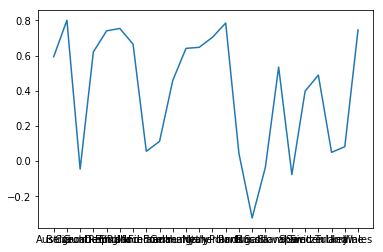

In [110]:
plt.plot(test['team_goal_count']['team_a_xg'])

In [37]:
test.columns=test.columns.droplevel(0)

In [38]:
test.columns = test.columns.map(lambda x: x[1]) 

IndexError: string index out of range

In [23]:
test = test.reset_index()
test = test.rename(columns={'e':'Correlation with xG'})

In [24]:
plt.scatter(test['team_name'],test['Correlation with xG'],marker='o',c='')

KeyError: 'Correlation with xG'

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(25, 6), dpi=80)

plt.bar(test['team_name'],test['Correlation with xG'])

KeyError: 'team_name'

<Figure size 2000x480 with 0 Axes>

C:\Users\zhiyu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [27]:
Euros_teams_df_agg = Euros_teams_df.groupby('team_name').median()

In [28]:
Euros_teams_df_agg['xG_dif'] = Euros_teams_df_agg['team_a_xg'] - Euros_teams_df_agg['team_goal_count']

In [ ]:
test= test.drop(columns='index')

In [33]:
new_df = test.join(Euros_teams_df_agg,on='team_name',how='inner')

C:\Users\zhiyu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [34]:
new_df_final = new_df[['team_name','Correlation with xG']]

KeyError: "['Correlation with xG'] not in index"

In [25]:
new_df_final.sort_values(by='Correlation with xG').plot(kind='barh',color = 'forestgreen',figsize=(8, 10), zorder=2, width=0.85)
y_pos = np.arange(len(test))
plt.yticks(y_pos, new_df_final['team_name'])
plt.title('Euro 2020 teams xG vs actual goals scored correlation')
#plt.savefig('plots/Euro_predictor_corr.png',bbox_inches='tight')

NameError: name 'new_df_final' is not defined

In [35]:
new_df

,team_name,"(team_name, )","(team_goal_count, team_a_xg)",team_goal_count,team_a_xg,team_b_xg,xG_dif
0,Austria,Austria,0.592785,1.5,1.485,0.980,-0.015
1,Belgium,Belgium,0.800663,2.0,0.920,0.840,-1.080
2,Croatia,Croatia,-0.045789,1.0,1.440,1.110,0.440
3,Czech Republic,Czech Republic,0.620415,1.0,1.610,0.970,0.610
4,Denmark,Denmark,0.740357,2.0,1.150,0.845,-0.850
5,England,England,0.753992,1.5,1.460,0.610,-0.040
6,FYR Macedonia,FYR Macedonia,0.664462,2.0,1.190,1.010,-0.810
7,Finland,Finland,0.055728,1.0,0.930,1.370,-0.070
8,France,France,0.111561,1.5,1.225,1.025,-0.275
9,Germany,Germany,0.458028,1.0,1.600,1.010,0.600


In [39]:
test

,,team_a_xg
0,Austria,0.592785
1,Belgium,0.800663
2,Croatia,-0.045789
3,Czech Republic,0.620415
4,Denmark,0.740357
5,England,0.753992
6,FYR Macedonia,0.664462
7,Finland,0.055728
8,France,0.111561
9,Germany,0.458028


In [40]:
Euros_teams_df

,Competition,team_name,team_goal_count,team_a_xg,team_b_xg,euro_team
0,International Friendly,Belgium,1,0.93,0.79,Belgium
1,UEFA Nations League,Belgium,5,1.61,0.73,Belgium
2,UEFA Nations League,Belgium,2,0.61,1.64,Belgium
3,UEFA Nations League,Belgium,4,0.64,0.89,Belgium
4,WC Qualifiers,Belgium,3,1.48,0.67,Belgium
...,...,...,...,...,...,...
234,UEFA Nations League,Portugal,3,1.92,0.54,Portugal
235,UEFA Nations League,Portugal,2,2.01,0.76,Portugal
236,UEFA Nations League,Portugal,0,1.21,1.07,Portugal
237,WC Qualifiers,Portugal,2,1.43,1.78,Portugal


In [41]:
from sklearn.metrics import mean_squared_error

In [46]:
Euros_teams_df.groupby(Euros_teams_df.team_name).apply(lambda x: mean_squared_error(x.team_goal_count,x.team_a_xg)**0.5)

team_name
Austria           0.746056
Belgium           2.352407
Croatia           1.009346
Czech Republic    1.508325
Denmark           2.143807
England           1.129805
FYR Macedonia     1.252724
Finland           0.844808
France            1.455253
Germany           0.914904
Hungary           1.080175
Italy             1.438099
Netherlands       1.384612
Poland            0.835386
Portugal          1.543524
Russia            1.385659
Scotland          1.292447
Slovakia          0.664297
Spain             1.890899
Sweden            0.910879
Switzerland       1.731401
Turkey            1.402465
Ukraine           0.910516
Wales             0.521181
dtype: float64

In [48]:
test_2_df = pd.DataFrame(Euros_teams_df.groupby(Euros_teams_df.team_name).apply(lambda x: mean_squared_error(x.team_goal_count,x.team_a_xg)))

In [57]:
test_2_df.columns = test_2_df.columns.map(lambda x: x[1]) 

TypeError: 'int' object is not subscriptable

In [59]:
test_2_df.columns

RangeIndex(start=0, stop=1, step=1)

In [60]:
Euros_teams_df.columns

Index(['Competition', 'team_name', 'team_goal_count', 'team_a_xg', 'team_b_xg',
       'euro_team'],
      dtype='object')

In [61]:
test_2_df.index = list(test_2_df.index)


In [67]:
test_2_df.columns

RangeIndex(start=0, stop=1, step=1)

In [73]:
test_2_df=test_2_df.rename(columns={0:'RMSE'})

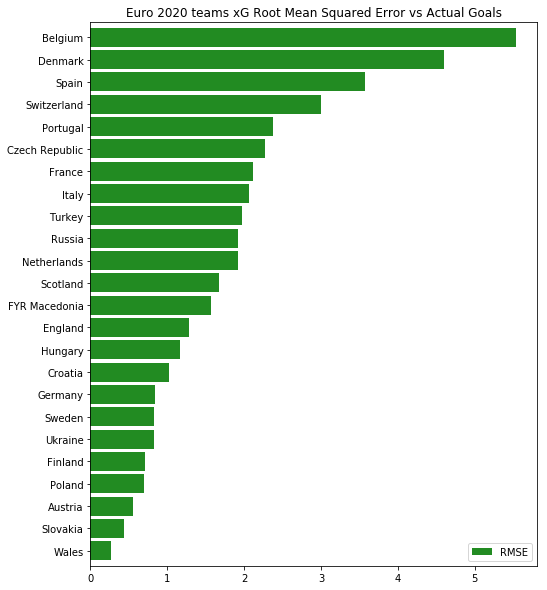

In [103]:
test_2_df.sort_values(by='RMSE').plot(kind='barh',color = 'forestgreen',figsize=(8, 10), zorder=2, width=0.85)
y_pos = np.arange(len(test_2_df))
#plt.yticks(y_pos, new_df_final['team_name'])
plt.title('Euro 2020 teams xG Root Mean Squared Error vs Actual Goals')
plt.savefig('plots/Euro_2020_xG_RMSE.png',bbox_inches='tight')


In [77]:
Euros_teams_df['goals_over_xg'] = Euros_teams_df['team_goal_count'] - Euros_teams_df['team_a_xg'] 

In [84]:
goal_over_xg_df = Euros_teams_df[['team_name','goals_over_xg']].groupby('team_name').mean()

In [85]:
goal_over_xg_df

,goals_over_xg
team_name,
Austria,-0.108000
Belgium,1.696000
Croatia,-0.038000
Czech Republic,0.084444
Denmark,1.031000
England,0.042000
FYR Macedonia,0.653636
Finland,0.191818
France,0.476000


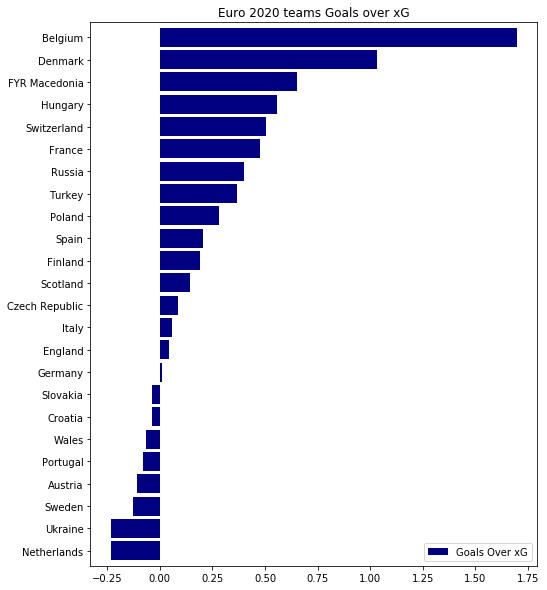

In [104]:
goal_over_xg_df.sort_values(by='Goals Over xG').plot(kind='barh',color = 'navy',figsize=(8, 10), zorder=2, width=0.85)
y_pos = np.arange(len(goal_over_xg_df))
#plt.yticks(y_pos, goal_over_xg_df['team_name'])
plt.title('Euro 2020 teams Goals over xG')
plt.ylabel('')

plt.savefig('plots/Euro_2020_goals_over_xg.png',bbox_inches='tight')

In [93]:
goal_over_xg_df

,o
team_name,
Austria,-0.108000
Belgium,1.696000
Croatia,-0.038000
Czech Republic,0.084444
Denmark,1.031000
England,0.042000
FYR Macedonia,0.653636
Finland,0.191818
France,0.476000


In [92]:
goal_over_xg_df.columns = goal_over_xg_df.columns.map(lambda x: x[1]) 

In [94]:
goal_over_xg_df=goal_over_xg_df.rename(columns={'o':'Goals Over xG'})

In [98]:
goal_over_xg_df.columns=goal_over_xg_df.columns.droplevel(0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [105]:
1+1

2